In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/Wu/Desktop/uOttawa/MDTI/DTI6997 Research Project/Data Cleaned.csv')
data['Star_rating'] = data['Star_rating'] -1
data

,Unnamed: 0,Content,Star_rating,Rating
0,0,easy website easy website fast shipping wonder...,3,Great
1,1,hey merry christmas nike hey merry christmas n...,0,Bad
2,2,nike along apple coca cola supporting slavery ...,0,Bad
3,3,ordered shoe 16th day ordered shoe 16th day or...,0,Bad
4,4,bad service good product,0,Bad
...,...,...,...,...
231,231,recommend nikecom give nikecom 5 star always s...,4,Excellent
232,232,great shoe jogger,3,Great
233,233,bought expensive running shoe bought expensive...,0,Bad
234,234,ordered lot site ordered lot site always get g...,4,Excellent


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
text_vect = tfidf_vect.fit_transform(data["Content"])

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_vect, data["Star_rating"], test_size = 0.2, random_state = 0)

In [4]:
# Apply linear SVM model
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.1, penalty='l2').fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(svc.score(x_train,y_train),svc.score(x_test,y_test)))

Training accuracy is 0.77 and test accuracy is 0.75


In [5]:
from sklearn import metrics
print(metrics.classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.74      0.92      0.82        25

    accuracy                           0.75        48
   macro avg       0.33      0.36      0.34        48
weighted avg       0.68      0.75      0.71        48



C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.metrics import confusion_matrix 
import numpy as np

cm = confusion_matrix(y_test, svc.predict(x_test))
print(cm)

[[13  0  0  0  2]
 [ 1  0  0  0  0]
 [ 0  0  0  0  3]
 [ 0  0  1  0  3]
 [ 0  0  0  2 23]]


<AxesSubplot:>

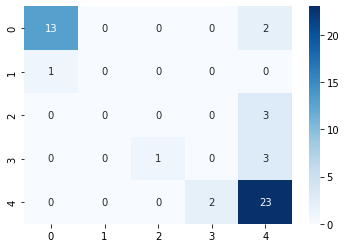

In [7]:
import seaborn as sns
import numpy as np
sns.heatmap(cm, annot=True, cmap='Blues')


In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [9]:
# Binarize the output
y_temp = y_test
y_temp = label_binarize(y_temp, classes=[0, 1, 2, 3, 4])
n_classes = y_temp.shape[1]

In [10]:
y_score = svc.decision_function(x_test)

In [11]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [12]:
from scipy import interp
from numpy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [13]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

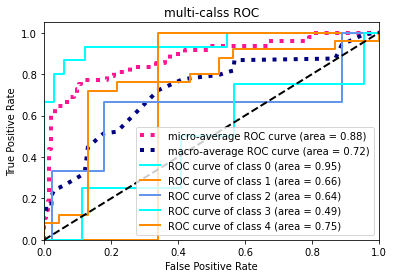

In [14]:
import matplotlib.pyplot as plt
from itertools import cycle
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
 
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-calss ROC')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [15]:
# Apply GradientBoosting model
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=5, max_features=1,random_state=0)
gbrt.fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(gbrt.score(x_train, y_train),gbrt.score(x_test, y_test)))

Training accuracy is 0.78 and test accuracy is 0.77


In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test,gbrt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.71      1.00      0.83        25

    accuracy                           0.77        48
   macro avg       0.33      0.36      0.34        48
weighted avg       0.66      0.77      0.70        48



C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix 
import numpy as np

cm = confusion_matrix(y_test, gbrt.predict(x_test))
print(cm)

[[12  0  0  0  3]
 [ 1  0  0  0  0]
 [ 0  0  0  0  3]
 [ 0  0  0  0  4]
 [ 0  0  0  0 25]]


<AxesSubplot:>

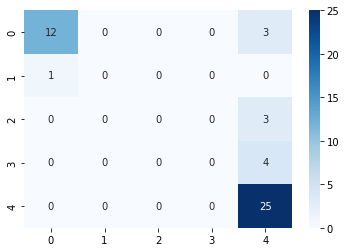

In [18]:
import seaborn as sns
import numpy as np
sns.heatmap(cm, annot=True, cmap='Blues')

In [19]:
y_score = gbrt.decision_function(x_test)

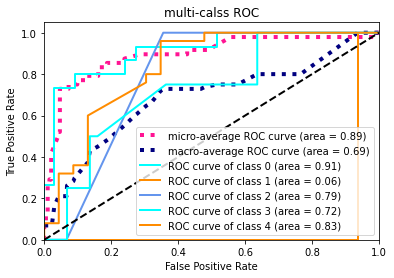

In [20]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
from scipy import interp
from numpy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr["micro"], tpr["micro"], _ = roc_curve(y_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

import matplotlib.pyplot as plt
from itertools import cycle
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
 
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-calss ROC')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Apply KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)
print('Training accuracy is %.2f and test accuracy is %.2f' %(KNN.score(x_train, y_train),KNN.score(x_test, y_test)))

Training accuracy is 0.68 and test accuracy is 0.65


In [22]:
print(metrics.classification_report(y_test,KNN.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.00      0.00      0.00         1
           2       0.33      0.33      0.33         3
           3       0.00      0.00      0.00         4
           4       0.78      0.72      0.75        25

    accuracy                           0.65        48
   macro avg       0.41      0.37      0.39        48
weighted avg       0.72      0.65      0.68        48



In [23]:
cm = confusion_matrix(y_test, KNN.predict(x_test))
print(cm)

[[12  1  0  1  1]
 [ 0  0  0  0  1]
 [ 1  0  1  1  0]
 [ 0  0  1  0  3]
 [ 0  0  1  6 18]]


<AxesSubplot:>

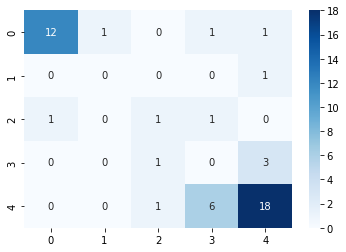

In [24]:
import seaborn as sns
import numpy as np
sns.heatmap(cm, annot=True, cmap='Blues')

In [25]:
y_score = KNN.predict(x_test)
y_score = label_binarize(y_score, classes=[0, 1, 2, 3, 4])

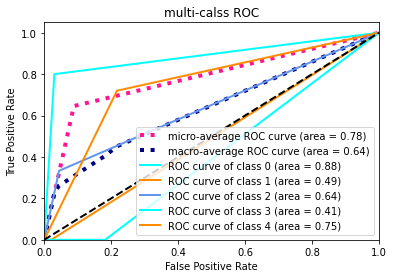

In [26]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_temp[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
from scipy import interp
from numpy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

fpr["micro"], tpr["micro"], _ = roc_curve(y_temp.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

import matplotlib.pyplot as plt
from itertools import cycle
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
 
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
 
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('multi-calss ROC')
plt.legend(loc="lower right")
plt.show()